In [1]:
import nibabel as nib
import matplotlib.pyplot as plt

In [2]:
train_preRT_t2 = nib.load('/cluster/projects/vc/data/mic/open/HNTS-MRG/train/10/preRT/10_preRT_T2.nii.gz').get_fdata()
train_preRT_mask = nib.load('/cluster/projects/vc/data/mic/open/HNTS-MRG/train/10/preRT/10_preRT_mask.nii.gz').get_fdata()
train_midRT_t2 = nib.load('/cluster/projects/vc/data/mic/open/HNTS-MRG/train/10/midRT/10_midRT_T2.nii.gz').get_fdata()
train_midRT_mask = nib.load('/cluster/projects/vc/data/mic/open/HNTS-MRG/train/10/midRT/10_midRT_mask.nii.gz').get_fdata()
train_midRT_preRT_t2 = nib.load('/cluster/projects/vc/data/mic/open/HNTS-MRG/train/10/midRT/10_preRT_T2_registered.nii.gz').get_fdata()
train_midRT_preRT_mask = nib.load('/cluster/projects/vc/data/mic/open/HNTS-MRG/train/10/midRT/10_preRT_mask_registered.nii.gz').get_fdata()

In [3]:
print(train_preRT_t2.shape)
print(train_preRT_mask.shape)
print(train_midRT_t2.shape)
print(train_midRT_mask.shape)
print(train_midRT_preRT_t2.shape)
print(train_midRT_preRT_mask.shape)

(512, 512, 75)
(512, 512, 75)
(512, 512, 76)
(512, 512, 76)
(512, 512, 76)
(512, 512, 76)


In [12]:
slice = 40

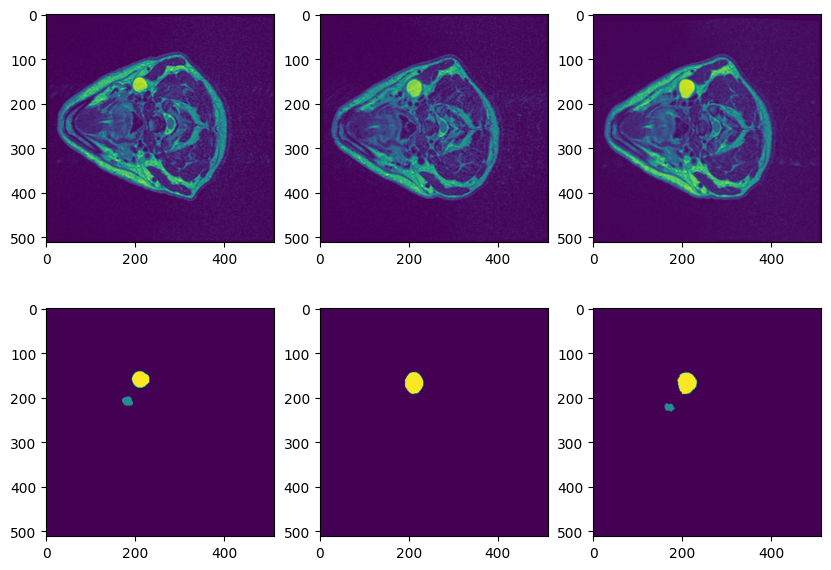

In [5]:
fig, ax = plt.subplots(2, 3, figsize=(10,7))
ax[0, 0].imshow(train_preRT_t2[:, :, slice])
ax[0, 1].imshow(train_midRT_t2[:, :, slice])
ax[0, 2].imshow(train_midRT_preRT_t2[:, :, slice])
ax[1, 0].imshow(train_preRT_mask[:, :, slice])
ax[1, 1].imshow(train_midRT_mask[:, :, slice])
ax[1, 2].imshow(train_midRT_preRT_mask[:, :, slice])
plt.show()

In [9]:
import numpy as np

In [12]:
np.unique(train_midRT_preRT_mask, return_counts=True)

(array([0., 1., 2.]), array([19887939,     8613,    26392]))

In [2]:
from data_modules.hnts_mrg import HNTSMRGDataModule

In [3]:
data = HNTSMRGDataModule(batch_size=1, task='preRT')
data.prepare_data()
data.setup()

In [9]:
train_img = data.train_set[0]['image']
train_label = data.train_set[0]['label']
test_img = data.test_set[0]['image']
test_label = data.test_set[0]['label']

In [10]:
print(train_img.shape)
print(train_label.shape)
print(test_img.shape)
print(test_label.shape)

torch.Size([1, 192, 192, 48])
torch.Size([2, 192, 192, 48])
torch.Size([1, 512, 512, 124])
torch.Size([2, 512, 512, 124])


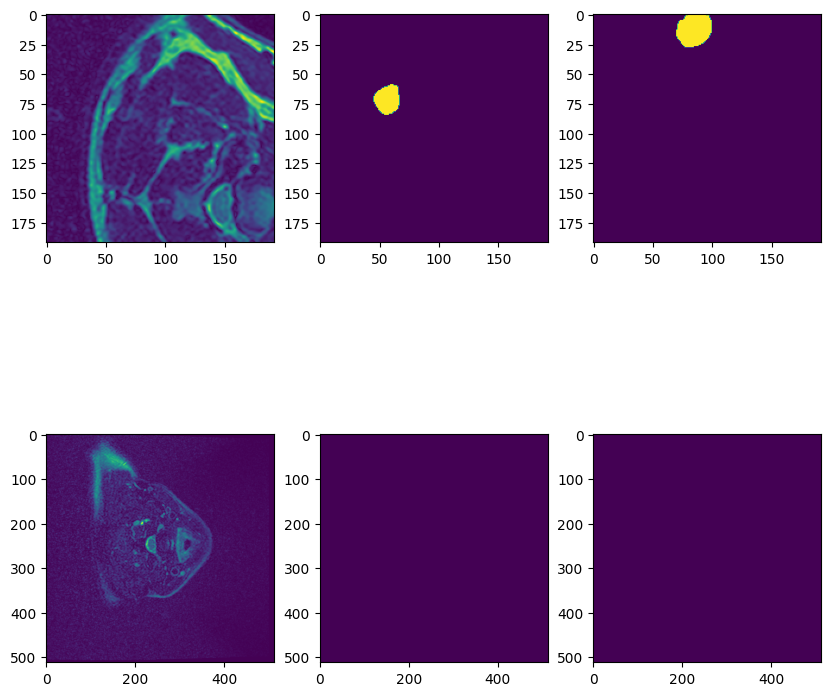

In [11]:
slice = 30

fig, ax = plt.subplots(2, 3, figsize=(10,10))
ax[0, 0].imshow(train_img[0, :, :, slice])
ax[0, 1].imshow(train_label[0, :, :, slice])
ax[0, 2].imshow(train_label[1, :, :, slice])
ax[1, 0].imshow(test_img[0, :, :, slice])
ax[1, 1].imshow(test_label[0, :, :, slice])
ax[1, 2].imshow(test_label[1, :, :, slice])
plt.show()